In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action="ignore")

titanic_df = pd.read_csv("titanic_train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic_df.dropna(inplace=True)
titanic_df["Sex"] = titanic_df.Sex.replace({'male':0,'female':1})
Y = titanic_df['Survived']
X = titanic_df[['Sex','Age','SibSp','Parch']]
log_reg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)
log_reg.fit(X_train, y_train)

LogisticRegression()

In [3]:
titanik_tahmin_modeli = LogisticRegression()
titanik_tahmin_modeli.fit(X_train, y_train)

tahmin_eğitim = titanik_tahmin_modeli.predict(X_train)
tahmin_test = titanik_tahmin_modeli.predict(X_test)
tahmin_test_ihtimal = titanik_tahmin_modeli.predict_proba(X_test)[:,1]

In [5]:
from sklearn.metrics import confusion_matrix
hata_matrisi_eğitim = confusion_matrix(y_train, tahmin_eğitim)
hata_matrisi_test = confusion_matrix(y_test, tahmin_test)
print("Hata Matrisi (Eğitim verileri)", "-"*30, hata_matrisi_eğitim, sep="\n")
print("Hata Matrisi (Test verileri)", "-"*30, hata_matrisi_test, sep="\n")

Hata Matrisi (Eğitim verileri)
------------------------------
[[29 17]
 [13 87]]
Hata Matrisi (Test verileri)
------------------------------
[[ 8  6]
 [ 3 20]]


In [6]:
TN = hata_matrisi_test[0][0]
TP = hata_matrisi_test[1][1]
FP = hata_matrisi_test[0][1]
FN = hata_matrisi_test[1][0]

print("Doğru negatif sayısı   :", TN)
print("Doğru pozitif sayısı   :", TP)
print("Yanlış pozitif sayısı  :", FP)
print("Yanlış negatif sayısı  :", FN)

Doğru negatif sayısı   : 8
Doğru pozitif sayısı   : 20
Yanlış pozitif sayısı  : 6
Yanlış negatif sayısı  : 3


In [7]:
from sklearn.metrics import accuracy_score

print("Modelden alınan doğruluk değeri : ",  titanik_tahmin_modeli.score(X_test, y_test))
print("Hesaplanan doğruluk değeri      : ",  (TN + TP)/(FN + FP + TN + TP))
print("accuracy_score() değeri         : ",  accuracy_score(y_test, tahmin_test))

Modelden alınan doğruluk değeri :  0.7567567567567568
Hesaplanan doğruluk değeri      :  0.7567567567567568
accuracy_score() değeri         :  0.7567567567567568


In [12]:
from sklearn.metrics import precision_score

print("Pozitif dediklerimizin ne kadarı gerçekten pozitif      : ",  (TP)/(FP + TP))
print("Pozitif dediklerimizin ne kadarı gerçekten pozitif (precision_score ile)     : ",  precision_score(y_test, tahmin_test))

Pozitif dediklerimizin ne kadarı gerçekten pozitif      :  0.7692307692307693
Pozitif dediklerimizin ne kadarı gerçekten pozitif (precision_score ile)     :  0.7692307692307693


In [13]:
from sklearn.metrics import recall_score

print("Gerçekte pozitif olanların ne kadarını doğru tahmin ettik   : ",  (TP)/(TP + FN))
print("Gerçekte pozitif olanların ne kadarını doğru tahmin ettik (recall_score ile)   : ",  recall_score(y_test, tahmin_test))

Gerçekte pozitif olanların ne kadarını doğru tahmin ettik   :  0.8695652173913043
Gerçekte pozitif olanların ne kadarını doğru tahmin ettik (recall_score ile)   :  0.8695652173913043


In [14]:
print("Hesaplanan özgünlük değeri (Negatif olanların ne kadarını doğru tahmin ettik)   : ",  (TN)/(TN + FP))

Hesaplanan özgünlük değeri (Negatif olanların ne kadarını doğru tahmin ettik)   :  0.5714285714285714


In [15]:
from sklearn.metrics import f1_score

hassasiyet_degeri = precision_score(y_test, tahmin_test)
duyarlılık_değeri = recall_score(y_test, tahmin_test)


print("Hesaplanan f1 skoru   : ",  2*((hassasiyet_degeri*duyarlılık_değeri)/(hassasiyet_degeri + duyarlılık_değeri)))
print("f1_score() değeri     : ",  f1_score(y_test, tahmin_test))

Hesaplanan f1 skoru   :  0.8163265306122449
f1_score() değeri     :  0.8163265306122449


In [16]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test,tahmin_test) )

print("f1_score() değeri        : {:.2f}".format(f1_score(y_test, tahmin_test)))
print("recall_score() değeri    : {:.2f}".format(recall_score(y_test, tahmin_test)))
print("precision_score() değeri : {:.2f}".format(precision_score(y_test, tahmin_test)))
print('\n')


              precision    recall  f1-score   support

           0       0.73      0.57      0.64        14
           1       0.77      0.87      0.82        23

    accuracy                           0.76        37
   macro avg       0.75      0.72      0.73        37
weighted avg       0.75      0.76      0.75        37

f1_score() değeri        : 0.82
recall_score() değeri    : 0.87
precision_score() değeri : 0.77




Değerler güzel bir yükseklikte çıktılar.

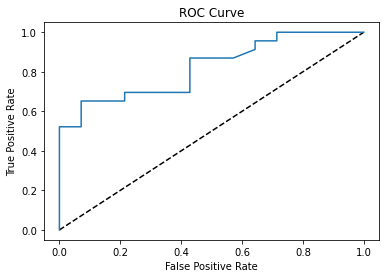

In [17]:
tahmin_test_ihtimal = titanik_tahmin_modeli.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, tahmin_test_ihtimal)

import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

ROC eğrisinin üzerinde çıktı çizgimiz. Yani modelimiz iyi. Bir de AUC değerine bakalım.

In [18]:
print('AUC Değeri : ', roc_auc_score(y_test, tahmin_test_ihtimal))

AUC Değeri :  0.8214285714285714


AUC değeri de modelimizin iyi olduğunu göstermektedir. 0.5'in üzerinde çıktı.

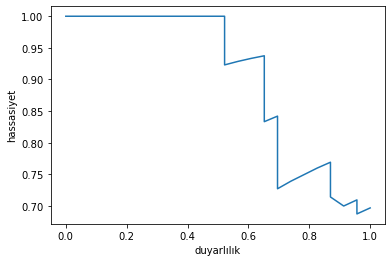

In [20]:
from sklearn.metrics import precision_recall_curve
hassasiyet, duyarlılık, _ = precision_recall_curve(y_test, tahmin_test_ihtimal)

plt.plot(duyarlılık, hassasiyet)
plt.xlabel("duyarlılık")
plt.ylabel("hassasiyet")
plt.show()

In [21]:
from sklearn.metrics import log_loss

print("Logartimik Kayıp (log-loss) : " , log_loss(y_test, tahmin_test_ihtimal))
print("Hata Oranı                  : " , 1- accuracy_score(y_test, tahmin_test))

Logartimik Kayıp (log-loss) :  0.4913927906910585
Hata Oranı                  :  0.2432432432432432


Logaritmik kayıp ve Hata oranı biraz fazla çıktılar. Model iyileştirilebilir.

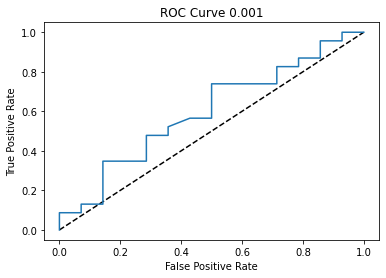

AUC Değeri : 0.5978 


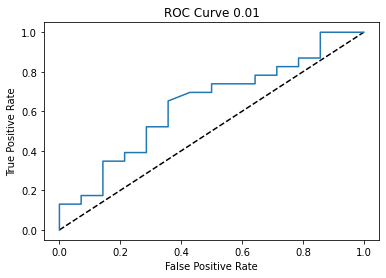

AUC Değeri : 0.6351 


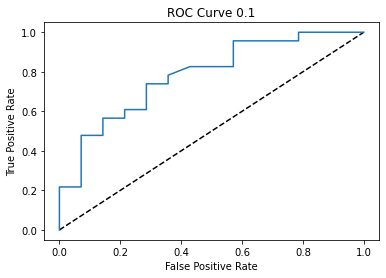

AUC Değeri : 0.7811 


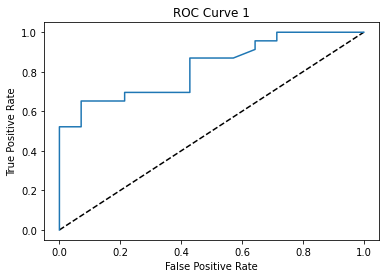

AUC Değeri : 0.8214 


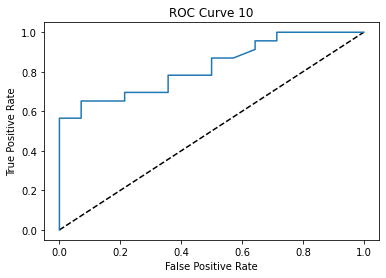

AUC Değeri : 0.8245 


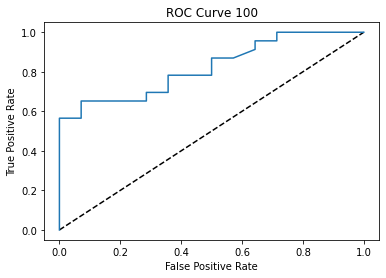

AUC Değeri : 0.8214 


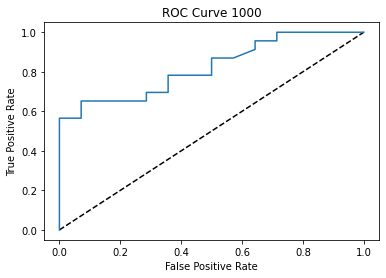

AUC Değeri : 0.8214 


In [32]:
C_değerleri = [0.001,0.01,0.1,1,10,100, 1000]

for c in C_değerleri:
  
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_train,y_train)
    
    

    tahmin_eğitim = lr.predict(X_train)
    tahmin_test = lr.predict(X_test)
    tahmin_test_ihtimal = lr.predict_proba(X_test)[:,1]    
    
    from sklearn.metrics import roc_curve, roc_auc_score

    fpr, tpr, thresholds  = roc_curve(y_test, tahmin_test_ihtimal)

    import matplotlib.pyplot as plt
    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve {}'.format(c))
    plt.show()
    
    print('AUC Değeri : {:.4f} '.format(roc_auc_score(y_test, tahmin_test_ihtimal)) )

C değerini 10 aldığımızda AUC değeri 0.8245 olan bir model elde ettik. En iyisi bu oldu. C değeri 10 alınabilir.


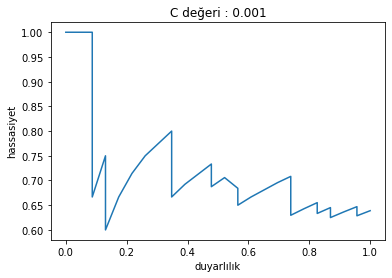

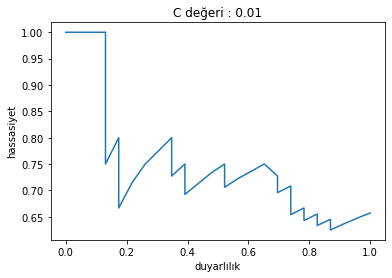

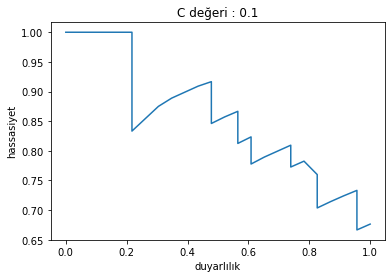

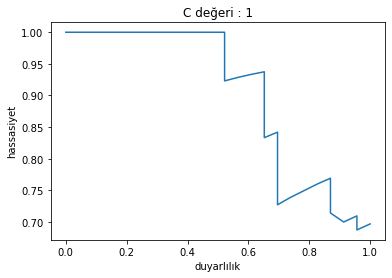

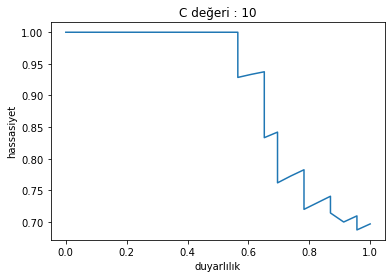

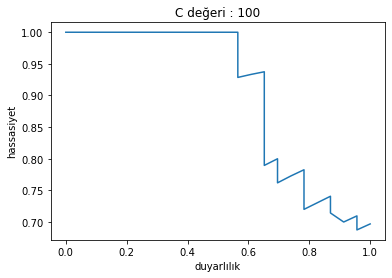

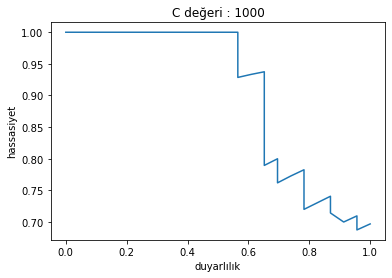

In [34]:
C_değerleri = [0.001,0.01,0.1,1,10,100, 1000]

for c in C_değerleri:
  
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_train,y_train)
    
    

    tahmin_eğitim = lr.predict(X_train)
    tahmin_test = lr.predict(X_test)
    tahmin_test_ihtimal = lr.predict_proba(X_test)[:,1]    
    
    
    from sklearn.metrics import precision_recall_curve
    hassasiyet, duyarlılık, _ = precision_recall_curve(y_test, tahmin_test_ihtimal)

    plt.plot(duyarlılık, hassasiyet)
    plt.xlabel("duyarlılık")
    plt.ylabel("hassasiyet")
    plt.title('C değeri : {}'.format(c))
    plt.show()

C değeri arttıkça daha iyi bir hassasiyet-duyarlılık eğrisi elde ettik.